# 1. Business Problem
## 1.1 Problem Context
Our client is a Taxi Service Company(TSC) based in New York. They provide transportation services to customers all over New York.
* Most of their customers are from the New York.
* They want to estimate the trip duration based on the previous travel patterns.
* Their goal is to provide more optimum service distribution to maximize their profits.
* They also want to calculate the price beforehand which directly depends on the trip duration.  

## 1.2 Problem Statement
The TSC has hired us to help them to find the duration that a trip can last through a data-driven approach.
* They've provided us a dataset of past travelling data. 
* Our task is to build a model using that dataset.
* The data was collected in 2016.
* Our task is to build a taxi-duration model using that dataset.



# 2. Machine Learning Problem
## 2.1 Data Overview
For this project:
* The dataset has 300k observations for previous trips.
* Each data point represents one trip. 
We have the following features:


Target variable
* 'trip_duration' -  duration of the trip in seconds
* 'dropoff_datetime'- date and time when the meter was disengaged.
* **Note** :Finding either of the value will help us calculate the second

Taxi information
* 'vendor_id' - a code indicating the provider associated with the trip record
* 'store_and_fwd_flag' - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
* 'passenger_count' - the number of passengers in the vehicle (driver entered value)

Trip Information
* 'dropoff_datetime'- date and time when the meter was disengaged
* 'passenger_count' - the number of passengers in the vehicle (driver entered value)
* 'pickup_longitude' - the longitude where the meter was engaged
* 'pickup_latitude' - the latitude where the meter was engaged
* 'dropoff_longitude' - the longitude where the meter was disengaged
* 'dropoff_latitude' - the latitude where the meter was disengaged
 

## 2.2 Mapping business problem to ML problem
### 2.2.1 Type of Machine Learning Problem
It is a regression problem, where given the above set of features, we need to predict the travelling duration of the trip.



## 2.3 Train-Test Splits
**80-20**

# 3. EDA

## 3.1 Importing all necessary packages 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from datetime import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar
import math  
from math import sqrt,radians,sin,cos
#import geopy.distance
#import mpu
# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import classes for ML Models
from sklearn.linear_model import Ridge  ## Linear Regression + L2 regularization
from sklearn.svm import SVR ## Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
import os
# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.externals import joblib  ## Reference http://scikit-learn.org/stable/modules/model_persistence.html

## 3.2 Loading the data

In [2]:
data=pd.read_csv("train.csv")



In [3]:
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


Dropping the dropoff_datetime column

In [4]:
data.drop(["dropoff_datetime"],inplace=True,axis=1)

In [5]:
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Displaying The columns 

In [6]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

Displaying the column data types

In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


**Observation**
* Since the trip duration is in seconds which is hard to visualize let's convert it into hours 
* The minimum value of passenger count is 0
* But this cannot be the case since without a passenger the driver cannot engage the meter
* Hence this could be the mistake of driver who accidently engaged the meter then disengaged it


Converting seconds into hours

In [9]:
data["trip_duration"]=data["trip_duration"]/3600

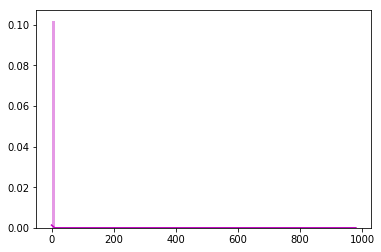

In [10]:
sns.distplot(data['trip_duration'].values, label = 'pickup_latitude',color="m",bins = 100)


In [11]:
len(data[data["trip_duration"]>2.5])

2146

There are some outliers ,removing them

In [12]:
data.drop(data[data["trip_duration"]>2.5].index,inplace=True)

Again visualizing trip duration

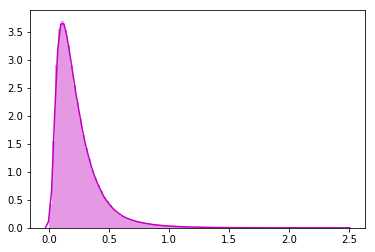

In [13]:
sns.distplot(data['trip_duration'].values, label = 'pickup_latitude',color="m",bins = 100)


Still there are some outliers , capping the max value at 1.5

In [14]:
len(data[data["trip_duration"]>1.5])

951

In [15]:

data.drop(data[data["trip_duration"]>1.5].index,inplace=True)

Deleting records with 0 passenger count

In [16]:
## To diplay the records with passenger count 0
data[data['passenger_count']==0].index

Int64Index([ 136519,  194288,  217765,  263809,  278290,  301600,  303133,
             337809,  375972,  383407,  412172,  415843,  437735,  447838,
             521316,  553862,  582469,  621221,  649337,  676906,  718163,
             722399,  727514,  776276,  777319,  796361,  827485,  875056,
             904688,  911071,  914211,  919750,  921640,  934078,  954696,
             986189, 1025067, 1032513, 1049209, 1092678, 1101359, 1122417,
            1131166, 1144278, 1211269, 1257574, 1262950, 1265736, 1276436,
            1280443, 1293792, 1296239, 1364548, 1368627, 1371117, 1414111,
            1433427, 1443353, 1444936],
           dtype='int64')

Deleting such records

In [17]:
data.drop(data[data['passenger_count']==0].index,inplace=True)

## 3.4 Distribution of numeric features

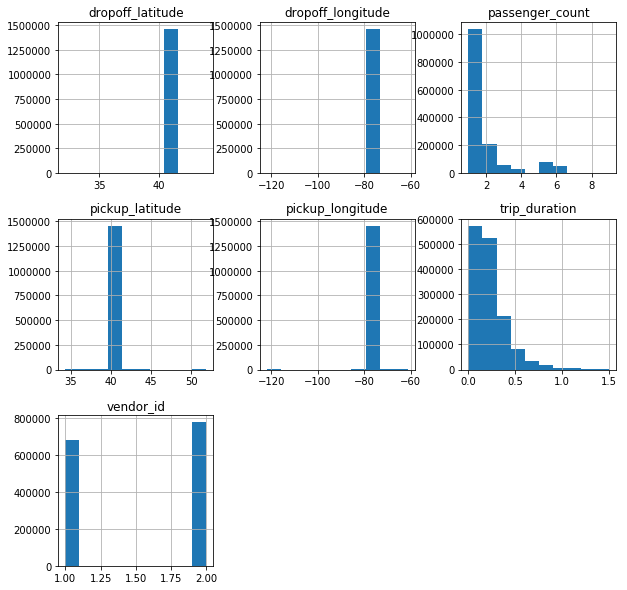

In [18]:
data.hist(figsize=(10,10))
print("")

**Observations**:

* Since the data is of New York City only ,the latitude and longitude of pickup and dropoff are bounded to a certain value.
* There are only two types of vendor ,their id masked as 1,2
 

## Visualizing the pickup latitude 

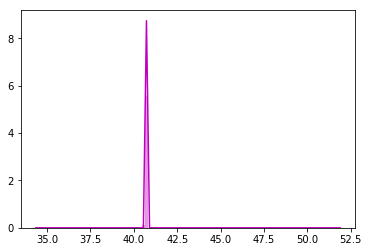

In [19]:
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100)


**observation:**
From the plot above it is clear that pickup  latitude are centered around 40 to 41

## Visualizing the pickup longitude

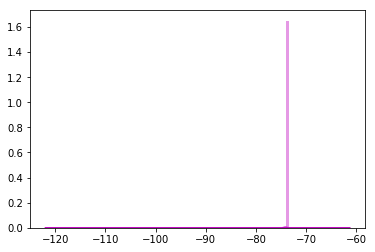

In [20]:
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins = 100)


**observations**
* From the plot it is clear that pick up longitude are situated around -74 to -73

##  Visualizing the dropoff latitude 

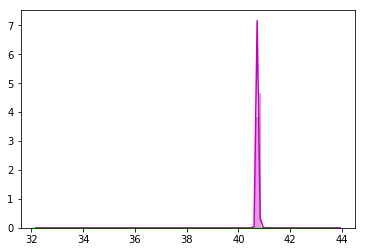

In [21]:
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, )


**Observation:**
* 
From the plot above it is clear that drop off latitude are centered around 40 to 41

##  Visualizing the dropoff  longitude

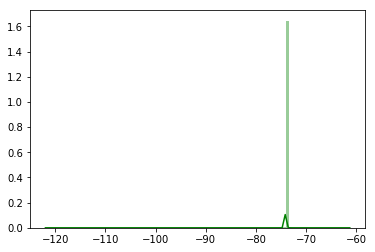

In [22]:
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100)


**Observation:**
* 
From the plot above it is clear that drop off longitude are centered around -74 to -73

So let us cap the latitude and longitude with the latitude and longitude found

In [23]:
df = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]

## Visualizing after capping the longitude and latitude 

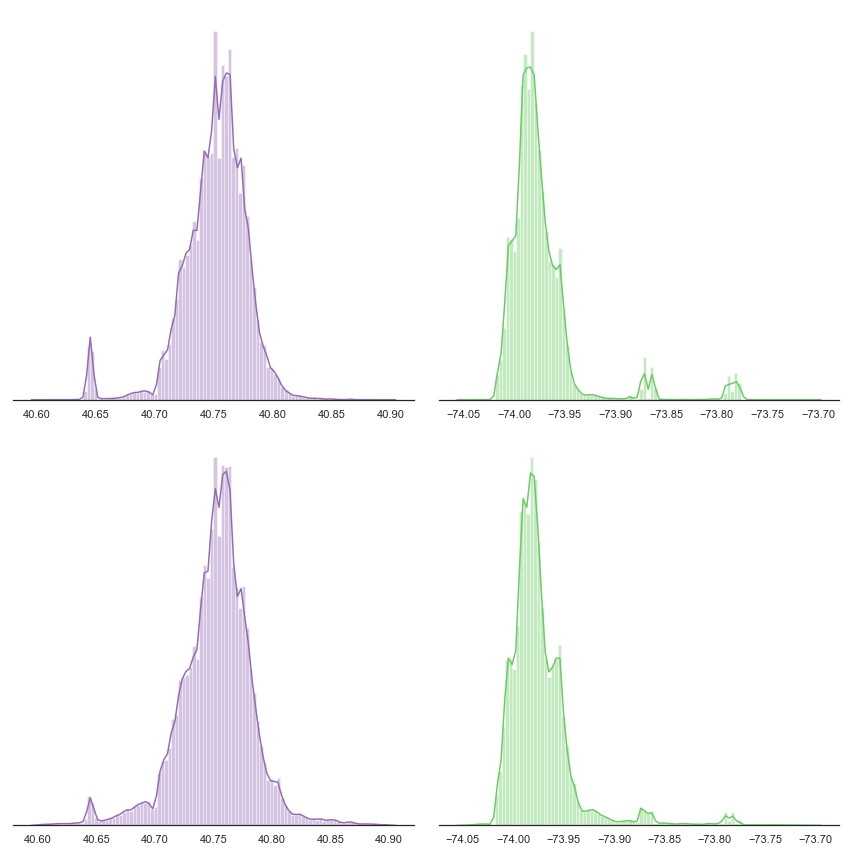

In [24]:

train_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(train_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(train_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(train_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(train_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

## Heatmap of coordinates


We have taken an empty image and make it a color it black so that we can see colors where the lat-longs are falling. To visualize we need to consider each point of this image as a point represented by lat-long, to achieve that we will bring the lat-long to image coordinate range and then take a summary of lat-long and their count, assign a different color for different count range. Running next cell will result in beautiful visualization shown below.

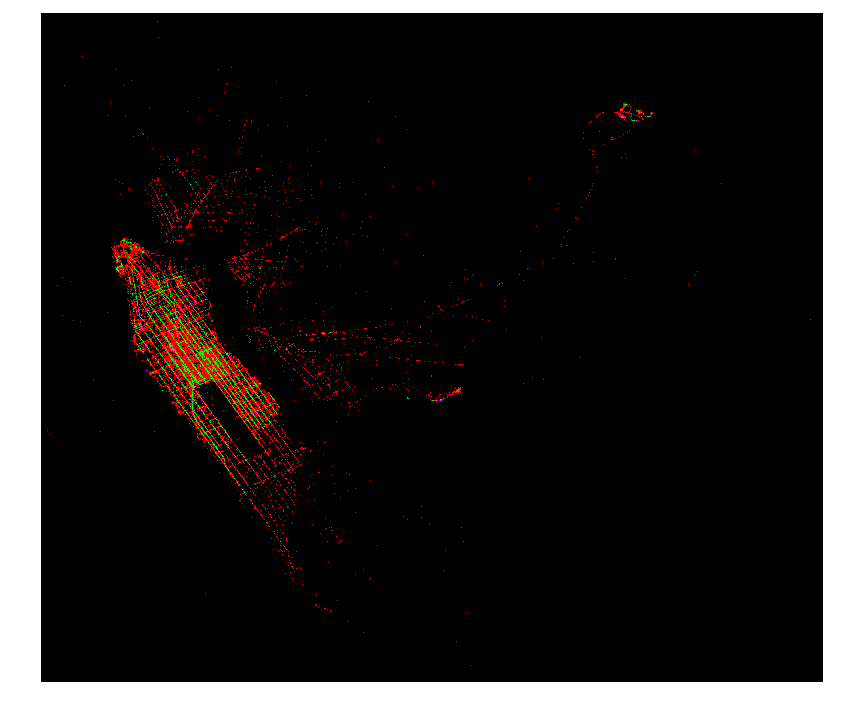

In [25]:
rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
train_data_new['pick_lat_new'] = list(map(int, (df['pickup_latitude'] - (40.6000))*10000))
train_data_new['drop_lat_new'] = list(map(int, (df['dropoff_latitude'] - (40.6000))*10000))
train_data_new['pick_lon_new'] = list(map(int, (df['pickup_longitude'] - (-74.050))*10000))
train_data_new['drop_lon_new'] = list(map(int,(df['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(train_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//50) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 255
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off() 

**Observations**
* Red points signifies that 1-10 trips in the given data have that point as pickup point
* Green points signifies that more than 10-50 trips in the given data have that point as pickup point 
* Yellow points signifies that more than 50+ trips in the given data have that point as pickup point
* Clearly, the whole manhattan is yellow colored and with few green points as well, that shows that in Manhatten most of the trips are getting originated. 

In [26]:
type(df['pickup_datetime'][0])

str

As the date time info is stored in string format let us first convert into timestamp format

In [27]:
#converting object type to datetime format
df['datetime']=pd.to_datetime(df['pickup_datetime'])

Since we are dealing with a time series problem it is reccomended that the data be sorted according to time.


In [148]:
data=df.sort_values(by="datetime")

Since the dataset is of almost 1.4 million points , let us take a subset of 20k points.

## 4 Feature Engineering

## 4.1 Separating combined data

The pickup_datetime column can be seperated into various columns

In [150]:
#Extracting date from date time
data["date"]=data['datetime'].dt.date

In [151]:
data["time"]=data["datetime"].dt.time

In [152]:
#extracting hour of pickup
data['hour_pick']=data.datetime.dt.hour

In [153]:
#extracting day of week, 0-sunday,1-monday.....
data['day_of_week']=data.datetime.dt.dayofweek

In [155]:
#Extracting Day of the Month
data['day_of_month']=data.datetime.dt.day

In [156]:
#Extracting month number , 1-January 2-February...
data['month']=data.datetime.dt.month

In [157]:
#if the time of pickup was night or day
data['is_night_time']=[1 if (i==0 or i>=19)  else 0 for i in data['datetime'].dt.hour]

In [158]:
#Extracting Week of the year
data['week']=data['datetime'].dt.week

In [159]:
#Extracting minute of pickup
data['min_of_pick']=data['datetime'].dt.minute

In [160]:
#Extracting weather info in numeric form
data['weather']=[1 if (i in [1,2,3,4]) else(2 if (i in [5,6,7,8]) else 3) for i in data['month']]

In [161]:
#Extracting quarter-hour of pickup
data['quarter']=data.datetime.dt.quarter


## 4.2 Taking the time importance

* Due to office hours the traffic increases due to which the duration also might increase.
* According to the blog(url=https://www.uber.com/blog/new-york-city/the-drivers-guide-to-traffic-in-a-new-york-minute/) posted on August 17 2016 the peak hours are between 8-9am then again between 3-7pm

In [162]:
## Function returns 1 if the hour is a peak hour
def check_peek(temp):
    if((temp>=15 and temp<=19) or temp==8 or temp==9):
        return 1
    return 0

In [163]:
data["peak_hours"]=data["hour_pick"].apply(check_peek)

## 4.3 Taking importance of day

The information of whether a day was declared holiday or not could have adverse affect.

In [164]:
cal = USFederalHolidayCalendar()


In [165]:
def check_holiday(str1):
    
    holidays = cal.holidays(start=str(str1.year)+'-01-01', end=str(str1.year)+'-12-31').to_pydatetime()
    if datetime.strptime(str(str1), '%Y-%m-%d') in holidays:
        
        return 1
    else:
        return 0
    

In [166]:
data["isHoliday"]=data["datetime"].dt.date.apply(check_holiday)

## 4.4 Taking the distance importance

* We have the pick up location information(latitude and longitude) and drop off location information.
* We can easily find the distance between these two points.

In [167]:
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
data.loc[:, 'direction'] = bearing_array(data['pickup_latitude'].values, 
                                          data['pickup_longitude'].values, 
                                          data['dropoff_latitude'].values,
                                          data['dropoff_longitude'].values)

In [168]:
#Latitude and Longitude to cartesian cordindates converesion
# Assuming Earth as sphere not ellipsoid 
def cartesian_x(lat,lon):
    lat=radians(lat)
    lon=radians(lon)
    R=6371.0
    x = R * cos(lat) * cos(lon)
    return x
def cartesian_y(lat,lon):
    lat=radians(lat)
    lon=radians(lon)
    R=6371.0
    y = R * cos(lat) * sin(lon)
    return y
# extracting cartesian x,y cordinates form latitude and longitude
data['x1']=[cartesian_x(i,j) for i,j in zip(data['pickup_latitude'],data['pickup_longitude'])]
data['y1']=[cartesian_y(i,j) for i,j in zip(data['pickup_latitude'],data['pickup_longitude'])]
data['x2']=[cartesian_x(i,j) for i,j in zip(data['dropoff_latitude'],data['dropoff_longitude'])]
data['y2']=[cartesian_y(i,j) for i,j in zip(data['dropoff_latitude'],data['dropoff_longitude'])]



In [169]:
#Manhattan Distance
data['Manhattan_dist'] =(data['x1'] - data['x2']).abs() +(data['y1'] - data['y2']).abs() 
#Chebyshev Distance
data['Chebyshev_dist']=[max(abs(i-j),abs(k-l)) for i,j,k,l in zip(data['x1'],
                                                                           data['y1'],data['x2'],
                                                                          data['y2'])]

# 5 Removing all unnecessary attributes

In [170]:
dict_flag={"Y":1,"N":0}

data["store_and_fwd_flag"]=data["store_and_fwd_flag"].map(lambda x: dict_flag[x])

In [171]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime               object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                float64
datetime              datetime64[ns]
date                          object
time                          object
hour_pick                      int64
day_of_week                    int64
day_of_month                   int64
month                          int64
is_night_time                  int64
week                           int64
min_of_pick                    int64
weather                        int64
quarter                        int64
peak_hours                     int64
isHoliday                      int64
direction                    float64
x1                           float64
y1                           float64
x

In [172]:
data.drop(["datetime","pickup_datetime","id","date","time"],axis=1,inplace=True)

In [173]:
len(data.columns)

26

# 6. Machine Learning Models
## 6.1 Data Preparation

Removing output variable from Input variables

In [174]:
y= data.trip_duration

In [175]:
X = data.drop("trip_duration",axis=1)

In [176]:
#standardisation of data
scaler = StandardScaler()
X=scaler.fit_transform(X)

## 6.3 Splitting The data

In [177]:
X_train=X[:64000]
y_train=y[:64000]

In [178]:
X_test=X[64000:80000]
y_test=y[64000:80000]

## 6.4 Model 1 - Baseline Model
* In this model, for every test data point, we will simply predict the average of the train labels as the output.
* We will use this simple model to perform hypothesis testing for other complex models.

In [179]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [180]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [181]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))
print("R2 score",r2_score(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  0.15086439448728794
Mean Absolute Error:  0.1088525752218967
R2 score 0.0


In [182]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error: ", mae(y_test, y_pred))
print("R2 score",r2_score(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  0.15212045429424997
Mean Absolute Error:  0.10947990030056425
R2 score -6.865054299320938e-05


## 6.5 Model 2 - Ridge Regression Model

In [183]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [184]:
model.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [185]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [186]:
## Predict Test results
y_pred = model.predict(X_test)

In [187]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))
print("R2 score",r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  0.08896029027398004
Mean Absolute Error:  0.062059600954675914
R2 score 0.6522886440164182


In [188]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error: ", mae(y_test, y_pred))
print("R2 score",r2_score(y_test.values, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  0.09010230908888076
Mean Absolute Error:  0.06376537876954234
R2 score 0.6491460033657532


## 6.6 Model-3 Random Forest Regression

In [189]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [191]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [192]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [193]:
## Predict Test results
y_pred = model.predict(X_test)

In [194]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))
print("R2 score",r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  0.042895089657447205
Mean Absolute Error:  0.025438263491044742
R2 score 0.9191571432525575


In [195]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error: ", mae(y_test, y_pred))
print("R2 score",r2_score(y_test.values, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  0.0721622524611932
Mean Absolute Error:  0.04827848175004009
R2 score 0.7749522125352339


## Feature Importance

In [198]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor( n_jobs=-1,n_estimators=400, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [200]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in data.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
y2
isHoliday
trip_duration
Manhattan_dist
y1
day_of_week
quarter
dropoff_latitude
direction
dropoff_longitude
x2
week
pickup_latitude
x1
pickup_longitude
hour_pick
month
passenger_count
vendor_id
is_night_time
peak_hours
store_and_fwd_flag
weather
min_of_pick
day_of_month


## Feature Importance

# 7. Save the winning model to disk

In [190]:
joblib.dump(model, 'final_model.pkl') 

['final_model.pkl']

* Saving the mean and standard deviation of the train dataset which is useful at the time of testing

In [201]:
(pd.DataFrame(scaler.mean_)).to_csv("mean_values.csv",index=False)

In [202]:
(pd.DataFrame(scaler.var_)).to_csv("var_values.csv",index=False)